# Part II - Ford GoBike System Data Exploration
## by Abdus-Salaam AbdulHafiz

## Investigation Overview


> `I'll be looking into the Ford Go Bike usage. I want to know when they are most frequently used in terms of period of day, hour during the day, day of the week as well as whether the majority of users are customers or subscribers.




## Dataset Overview

>This presentation examines a dataset that details individual rides taken in the greater San Francisco Bay area's bike-sharing system in February 2019.

> The dataset can be downloaded from https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv
    

In [12]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [13]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [14]:
#A little wrnagling
# make a copy of the original dataset to clean and extract some other feautures
df_copy = df.copy()

# extract day of the week(Mon-Sun)
df_copy['day_of_week'] = pd.to_datetime(df_copy['start_time']).dt.day_name()
#Extract day
df_copy['day'] = pd.to_datetime(df_copy['start_time']).dt.day
# extract hour
df_copy['start_hour'] = pd.to_datetime(df['start_time']).dt.hour
#Extract time period into morning, afternoon or night
df_copy['time_of_day'] = 'Morning'
df_copy['time_of_day'][(df_copy['start_hour'] >= 12) & (df_copy['start_hour'] <= 19)] = 'Afternoon'
df_copy['time_of_day'][(df_copy['start_hour'] >19) & (df_copy['start_hour'] <= 23)] = 'Night'


In [15]:
##Function for plotting
def countPlot(df,xVar,hue=None,order=None,annot=True,hue_order=None):
    
    # set plot dimension
    plt.figure(figsize=[14, 5])
            
    #choose base color
    base_color = sb.color_palette()[0]
    #plot
    sb.countplot(data = df, x = xVar,hue=hue, color = base_color,order=order,edgecolor='black',linewidth=2,hue_order=hue_order)
    if annot:
            var_counts = df[xVar].value_counts() 
            total_rides = var_counts.sum()
            # print frequency on the bar chart
            locs, labels = plt.xticks(size=14)
            for loc, label in zip(locs, labels):                
                count = var_counts[label.get_text()]
                pct_string = '{:0.1f}%'.format(100*count/total_rides)
                plt.text(loc, count-15000, pct_string, ha='center',color='white',fontsize=12)
               
    #after plotting,clean up varialble names
    xVar = xVar.replace('_',' ')#replace with a space
    if hue:
              hue = hue.replace('_',' ') 
            
    
    #Add title and format it 
    plt.title(f'''Distribution of {xVar} {'by' if hue else ''} {hue if hue else ''}'''.title(),fontsize=14,weight='bold')
    #xlabel and formatting
    plt.xlabel(xVar.title(),fontsize=10,weight='bold')
    #xlabel and formatting
    plt.ylabel('Rides'.title(),fontsize=10,weight='bold')
    
plt.show()

### Distribution of Daily Bike rides in a week
> Most rides were taken on Thursday(19.2%) and least rides where taken during the weekends 

> Less subscribers take more rides during the weekends

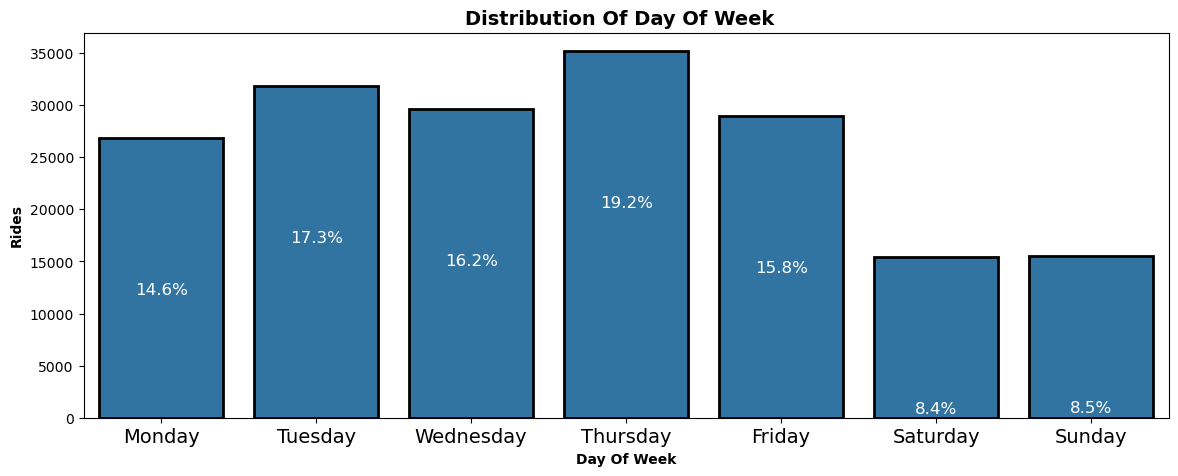

In [16]:
#day order
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
#calling function to plot graph
countPlot(df_copy,'day_of_week',order=day_order)

### Distribution of daily bike usage per type of member:
        >Thursdays generally have the highest number of rides for both subscribers and customers.

        > Weekends have low number of rides for subscribers, both pretty same number of rides for cusomers   higlighting the fact that the customers rather take rides as a leisure act everyday but the subscribers take it the rides more dut=ring weekdays and little on weekends

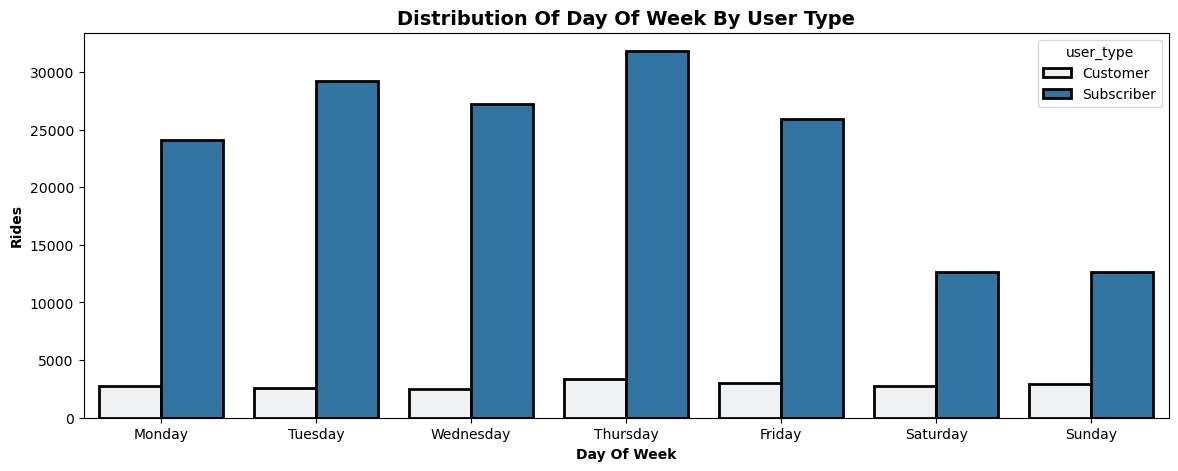

In [17]:
#day order
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
#plot
countPlot(df_copy,'day_of_week',hue = 'user_type',annot=False,order=day_order)

In [18]:
# make a copy of the original dataset to clean and extract some other feautures
df_copy = df.copy()

# extract day of the week(Mon-Sun)
df_copy['day_of_week'] = pd.to_datetime(df_copy['start_time']).dt.day_name()
#Extract day
df_copy['day'] = pd.to_datetime(df_copy['start_time']).dt.day
# extract hour
df_copy['start_hour'] = pd.to_datetime(df['start_time']).dt.hour
#Extract time period into morning, afternoon or night
df_copy['time_of_day'] = 'Morning'
df_copy['time_of_day'][(df_copy['start_hour'] >= 12) & (df_copy['start_hour'] <= 19)] = 'Afternoon'
df_copy['time_of_day'][(df_copy['start_hour'] >19) & (df_copy['start_hour'] <= 23)] = 'Night'


### Distribution of hourly bike usage per type of members

` Highest number of trips were taken around 8am and 5pm

` The least number of trips were taken between 3 and 4am

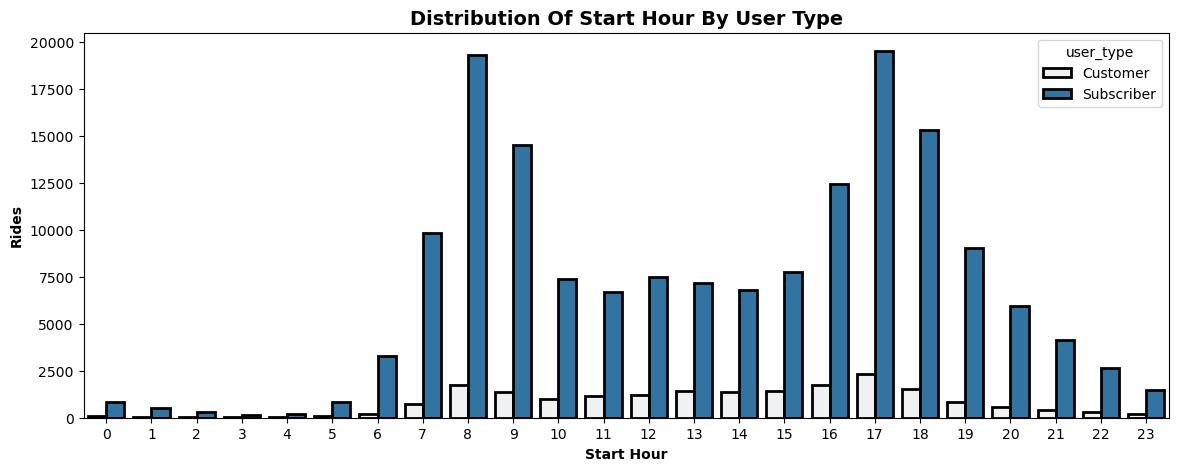

In [19]:
countPlot(df_copy,'start_hour',hue = 'user_type',annot=False)

###  Period of the day with most rides
> Most rides are in the afternoon(12pm-7pm) even though the peak rides come at 8 am.

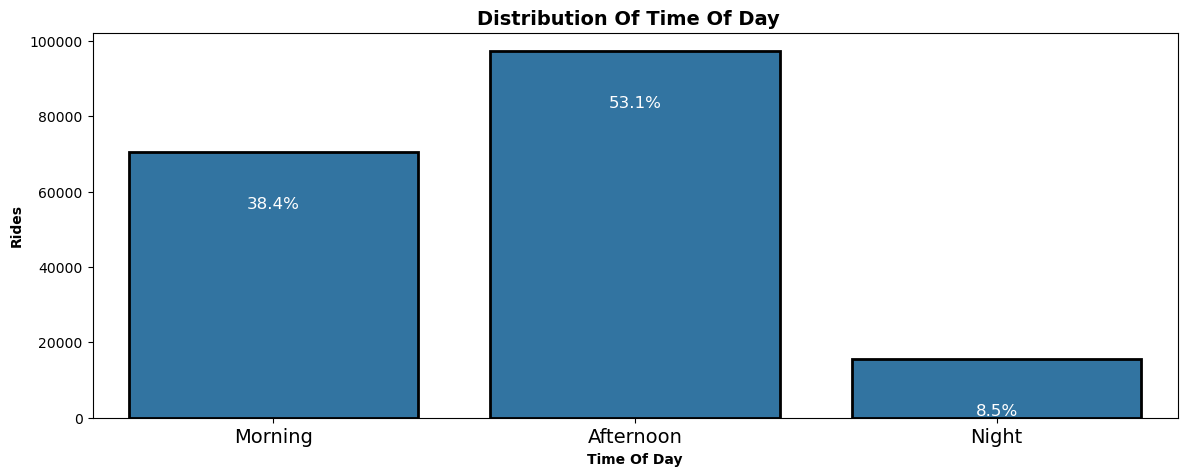

In [20]:
#order
period_order=['Morning','Afternoon','Night']
#calling function to plot graph
countPlot(df_copy,'time_of_day',order=period_order)

## Distribution of Bike Rides by Type of Member

> About 89.2% of our member are subscribers while 10.8% are customers

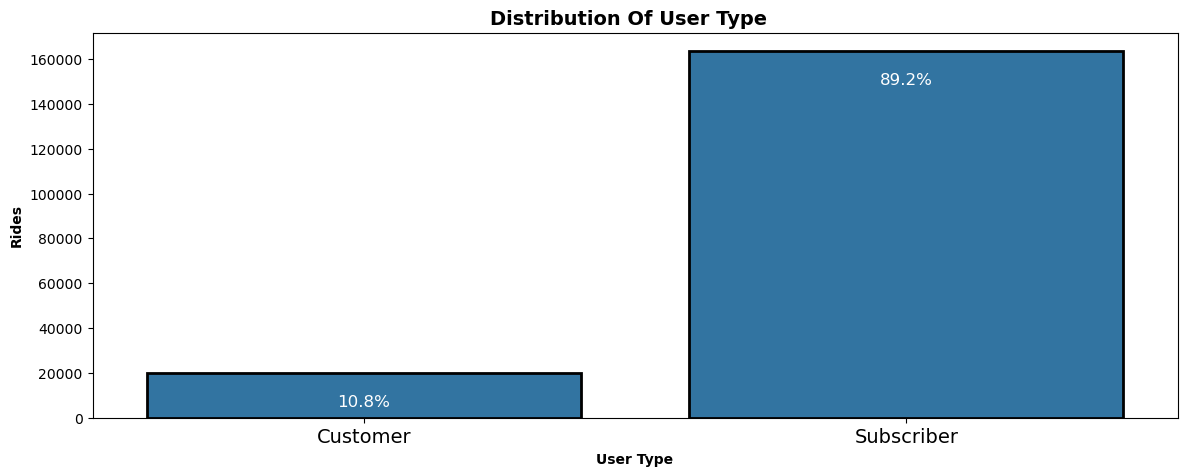

In [21]:
#calling function to plot graph
countPlot(df_copy,'user_type')

## Age group of our members

>Most members are in the age bracket 21-30yrs(38.2%) followed by 31-40 yrs(34.8%)
.'


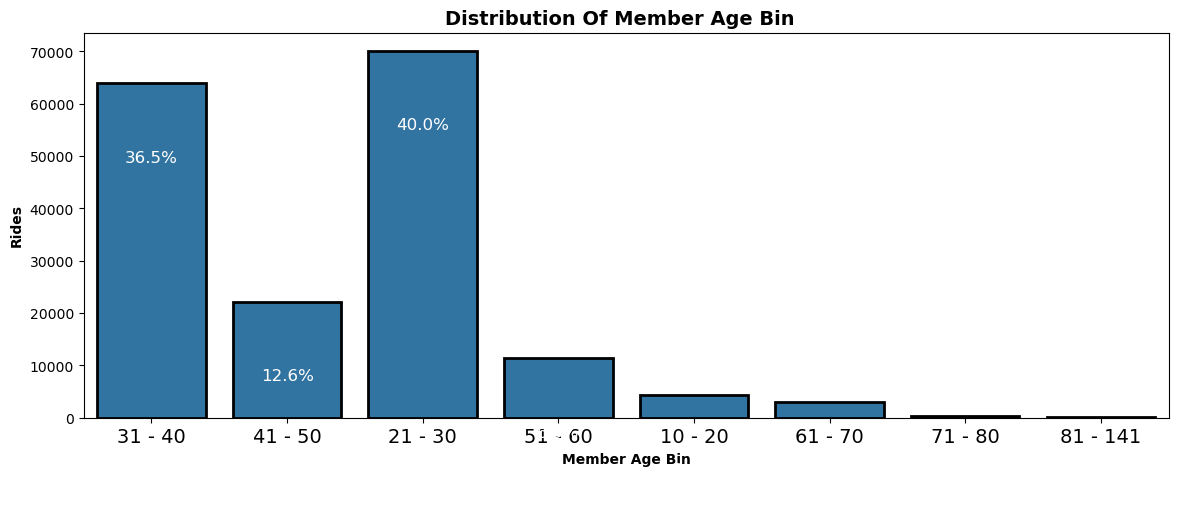

In [22]:
# create the age column taking the year 2019 as the current year
df_copy['member_age'] = df_copy['member_birth_year'].apply(lambda x: 2019 - x)
# drop the 'member_birth_year" column
df_copy.drop('member_birth_year' , axis = 1 , inplace = True)

# create a new column member_age_bin to group the members ages
max_age = str(int(df_copy.member_age.max()))
df_copy['member_age_bin'] = df_copy['member_age'].apply(lambda x: '10 - 20' if 10<x<=20 else 
                                                  '21 - 30' if 20<x<=30 else
                                                  '31 - 40' if 30<x<=40 else 
                                                  '41 - 50' if 40<x<=50 else
                                                  '51 - 60' if 50<x<=60 else
                                                  '61 - 70' if 60<x<=70 else
                                                  '71 - 80' if 70<x<=80 else
                                                  '81 - '+max_age if 80<x<=float(max_age) else x)


#calling function to plot graph
countPlot(df_copy,'member_age_bin')

In [23]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

^C


#!conda update -y -c anaconda nbconvert